In [2]:
# importing the necessary dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train_df = pd.read_csv(r'C:\Users\Ladhani\Desktop\Ai & ml 2\CapstoneProject\code\sign_mnist_train.csv')
test_df = pd.read_csv(r'C:\Users\Ladhani\Desktop\Ai & ml 2\CapstoneProject\code\sign_mnist_test.csv')

In [7]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [9]:
labels = train_df['label'].values

In [10]:
print("Missing values:\n", train_df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", train_df.duplicated().sum())

Missing values:
 label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
Duplicate rows: 0


In [11]:
def show_images(images,labels):
    images = images.values.reshape(-1,28,28,1)
    unique_labels = labels.unique()
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 5)
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k],cmap='gray')
            ax[i,j].set_title(str(unique_labels[labels[k]]))
            k = k+1;
#     plt.axis('off')
    plt.tight_layout()
    

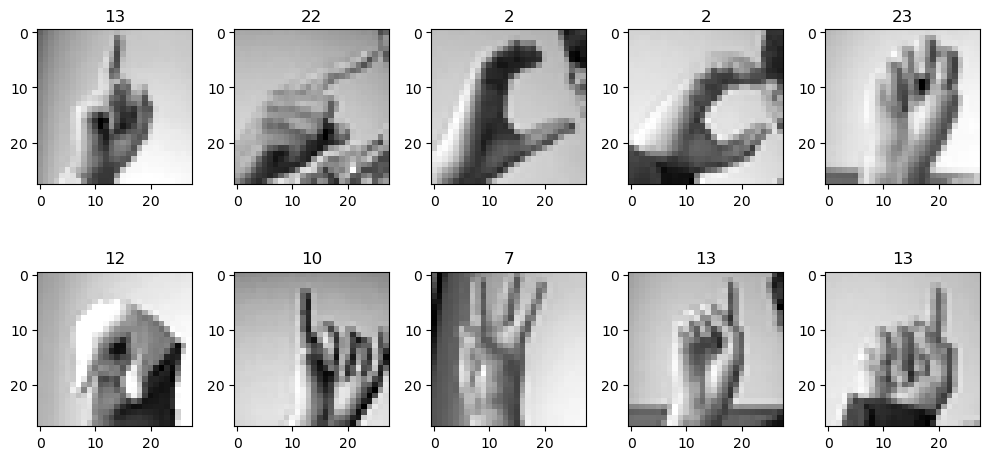

In [12]:
show_images(train_df.drop(columns='label'), train_df['label'])

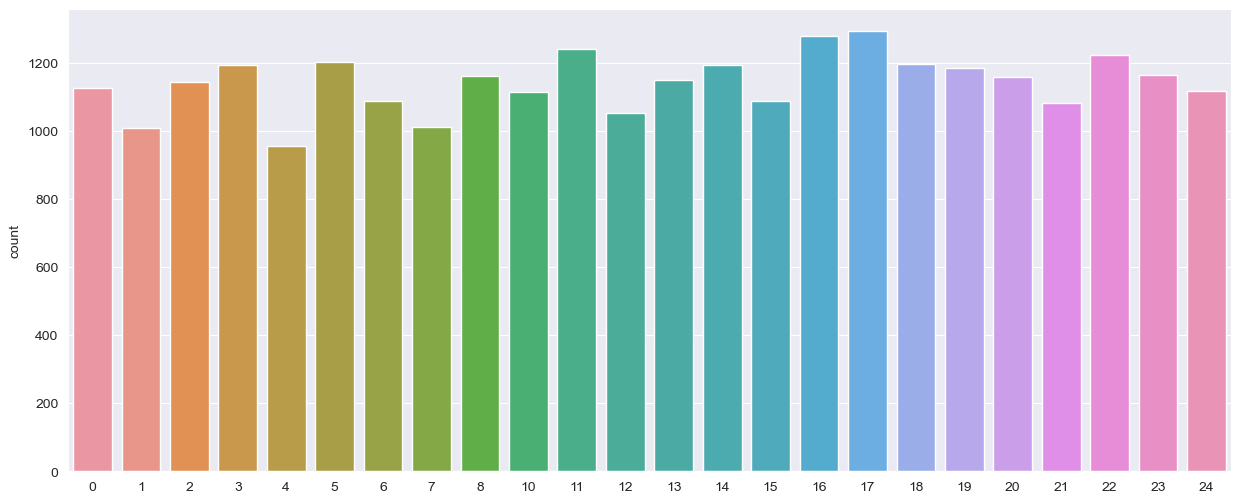

In [13]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=labels)
plt.show()

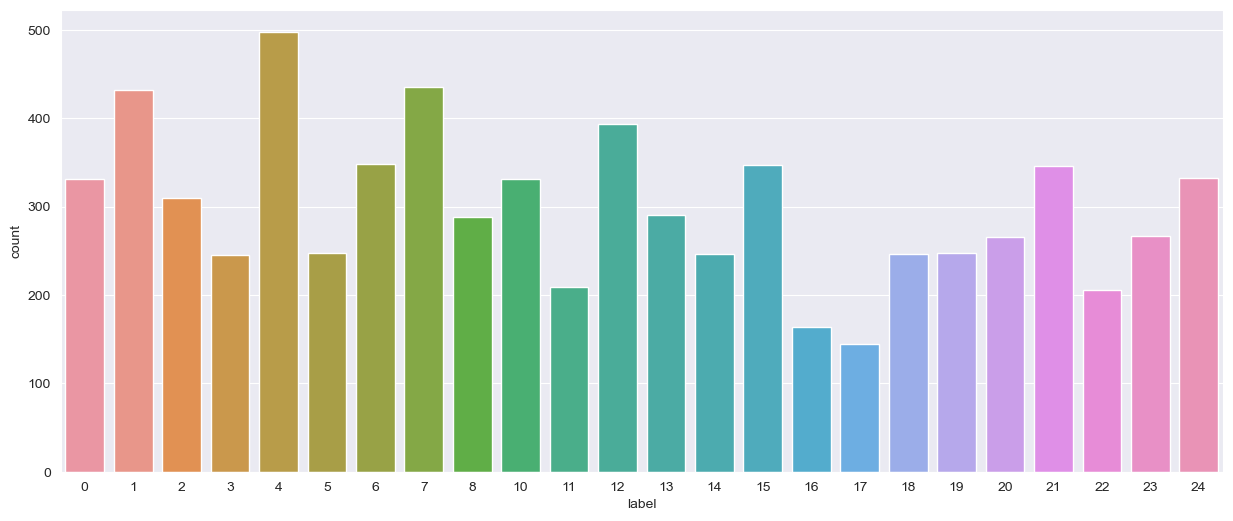

In [14]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=test_df['label'])
plt.show()

In [15]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [16]:
train_df.drop('label',axis=1,inplace=True)

In [17]:
images =  train_df.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [18]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [19]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [20]:
plt.rcParams["axes.grid"] = False

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


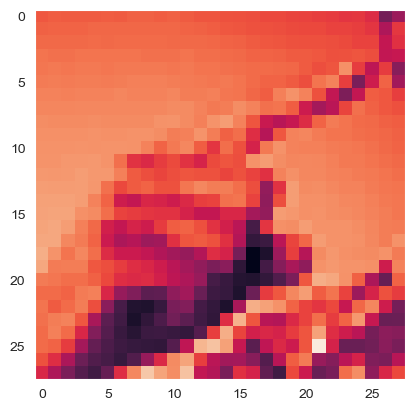

In [21]:
index = 1
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [22]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Use openCV to view 10 random images from our training data

import cv2
for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im =  images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Sample Image",sample)
    cv2.waitKey()
    
cv2.destroyAllWindows()

In [24]:
#split data into X_train, X_test, y_train and y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images,labels,test_size=0.3, random_state=101)

In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Start Loading our tensorflow modules and define our batch size etc
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [27]:
batch_size =128
num_classes = 24
epochs = 10

In [28]:
#Scale our images
X_train = X_train/255
X_test = X_test/255

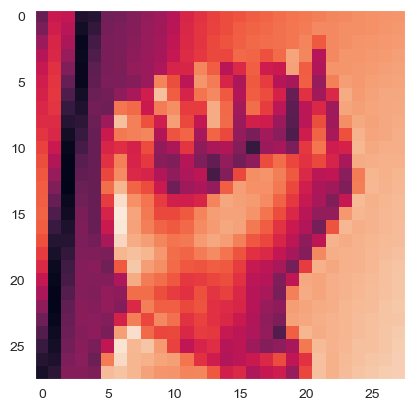

In [29]:
#Reshape them into the size required by TF and Keras
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

plt.imshow(X_train[0].reshape(28,28))

In [30]:
# Create our CNN Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1))) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))

model.add(Dense (num_classes, activation = 'softmax'))

In [31]:
#Compile Model
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(), metrics= ['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [33]:
#Train model

history = model.fit(X_train, y_train, validation_data= (X_test,y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/10
151/151 [==============================] - 15s 88ms/step - loss: 2.5644 - accuracy: 0.2101 - val_loss: 1.5869 - val_accuracy: 0.5296
Epoch 2/10
151/151 [==============================] - 13s 87ms/step - loss: 1.1749 - accuracy: 0.6080 - val_loss: 0.7057 - val_accuracy: 0.7771
Epoch 3/10
151/151 [==============================] - 13s 87ms/step - loss: 0.6612 - accuracy: 0.7754 - val_loss: 0.4637 - val_accuracy: 0.8532
Epoch 4/10
151/151 [==============================] - 13s 85ms/step - loss: 0.4421 - accuracy: 0.8500 - val_loss: 0.3079 - val_accuracy: 0.9037
Epoch 5/10
151/151 [==============================] - 13s 86ms/step - loss: 0.3063 - accuracy: 0.8964 - val_loss: 0.1737 - val_accuracy: 0.9528
Epoch 6/10
151/151 [==============================] - 13s 86ms/step - loss: 0.2037 - accuracy: 0.9325 - val_loss: 0.0996 - val_accuracy: 0.9750
Epoch 7/10
151/151 [==============================] - 13s 85ms/step - loss: 0.1533 - accuracy: 0.9487 - val_loss: 0.0701 - val_accuracy:

In [34]:
model.save("sign_mnist_cnn_10_epochs.h5")
print("Model Saved")

Model Saved


C:\Users\Ladhani\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


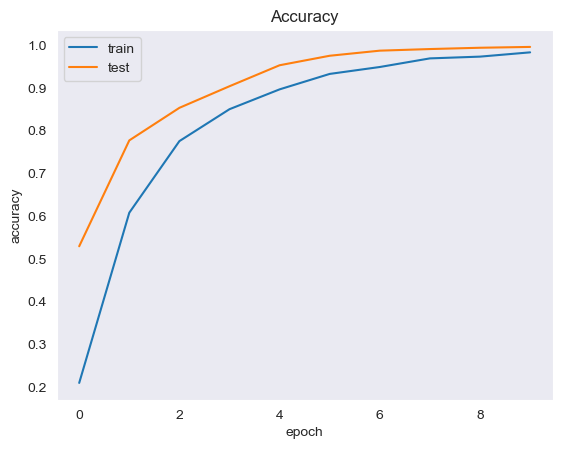

In [35]:
# View our training history graphically 

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [36]:
# Reshape our test data so that we can evaluate it's performance on unseen data 
test_labels = test_df['label']
test_df.drop('label', axis= 1, inplace=True)
test_images = test_df.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 [==============================] - 2s 7ms/step


In [37]:
# Get our accuracy score I
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8135805911879531

In [38]:
# Create function to match label to letter 
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: '0',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res =  int(result)
        return classLabels[res]
    except:
        return "Error"

## Test on Actual Webcam Input

In [39]:
import tensorflow as tf
model = tf.keras.models.load_model('sign_mnist_cnn_10_epochs.h5')

In [40]:
import cv2
import numpy as np
cap= cv2.VideoCapture (0)
while True:
    ret, frame = cap.read()
    ##############################
    frame=cv2.flip(frame, 1)
    #define region of interest 
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    roi = roi.reshape(1,28,28,1)
    result = model.predict(roi)
    predicted_class = np.argmax(result)
#     result = str(model.predict_classes(roi, 1, verbose = 0)[0])
#     cv2.putText(copy, getLetter (result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2) 
    cv2.putText(copy, getLetter(predicted_class), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

    cv2.imshow('frame', copy)
    
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 30ms/step


Performance is very low. Not able to any alphabet.
So now going to use large dataset which have more alphabet images.

## let's Use Keras's Data Augmentation to enhance our dataset

In [41]:
import tensorflow.keras
from tensorflow.keras. preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [42]:
batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [43]:
train_path = r'C:\Users\Ladhani\Desktop\Ai & ml 2\CapstoneProject\code\ASL_Dataset\train'
val_path = r'C:\Users\Ladhani\Desktop\Ai & ml 2\CapstoneProject\code\ASL_Dataset\val'

In [44]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

In [45]:
train_data = datagen.flow_from_directory(directory= train_path, 
                                         target_size=(image_size,image_size), 
                                         batch_size = batch, 
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path, 
                                       target_size=(image_size,image_size), 
                                       batch_size = batch, 
                                       class_mode='categorical',
                                       shuffle= False
                                       )

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [46]:
model = Sequential()
# input layer
# Block 1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (image_size,image_size,img_channel)))
model.add(Conv2D(32,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(Conv2D(64,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

#Block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

# fully connected layer
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(36, activation='softmax'))



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 100, 100, 32)      0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      36928     
                                                      

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
early_stoping = EarlyStopping(monitor='val_loss', 
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True, 
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', 
                                         patience = 2, 
                                         factor=0.5 , 
                                         verbose = 1)

In [48]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [49]:
asl_class = model.fit(train_data, 
                      validation_data= val_data, 
                      epochs=30, 
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/30
63/63 [==============================] - 234s 4s/step - loss: 2.4564 - accuracy: 0.3176 - val_loss: 0.7263 - val_accuracy: 0.8052 - lr: 0.0010
Epoch 2/30
63/63 [==============================] - 235s 4s/step - loss: 0.6694 - accuracy: 0.7898 - val_loss: 0.3274 - val_accuracy: 0.8986 - lr: 0.0010
Epoch 3/30
63/63 [==============================] - 231s 4s/step - loss: 0.3183 - accuracy: 0.8971 - val_loss: 0.2673 - val_accuracy: 0.9145 - lr: 0.0010
Epoch 4/30
63/63 [==============================] - 234s 4s/step - loss: 0.2256 - accuracy: 0.9269 - val_loss: 0.2874 - val_accuracy: 0.9085 - lr: 0.0010
Epoch 5/30
63/63 [==============================] - 228s 4s/step - loss: 0.1462 - accuracy: 0.9493 - val_loss: 0.2431 - val_accuracy: 0.9344 - lr: 0.0010
Epoch 6/30
63/63 [==============================] - 231s 4s/step - loss: 0.1045 - accuracy: 0.9662 - val_loss: 0.1954 - val_accuracy: 0.9404 - lr: 0.0010
Epoch 7/30
63/63 [==============================] - 192s 3s/step - loss: 0.1

## Now let's test the model

In [50]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.85089302062988
The Loss of the model for training data is: 0.0029748897068202496
The accuracy of the model for validation data is: 96.8190848827362
The Loss of the model for validation data is: 0.16937659680843353


In [51]:
model_json = model.to_json()
with open("sign_asl_cnn_30_epochs.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save('sign_asl_cnn_30_epochs.h5')
model.save_weights('model-sign_asl_cnn_30_epochs_weight.h5')
print('Weights saved')

Model Saved


C:\Users\Ladhani\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Weights saved


In [16]:
from tensorflow.keras.models import load_model

classifier = load_model('sign_asl_cnn_30_epochs.h5')

In [40]:
import cv2
import numpy as np
import skimage as ski
from skimage import filters


# Load a pre-trained classifier or model for making predictions
# Replace 'classifier' with your actual model or classifier

cap = cv2.VideoCapture(0)
def classes(result):
    class_labels = {i: str(i) if i < 10 else chr(65 + i - 10) for i in range(36)}
    return class_labels[result]

# class_labels = {0:'0', 1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',
#                14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',
#                28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}
while True:
    
    
    ret, frame = cap.read()
    
    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)
    
    '''# Define the ROI
    roi = frame[100:300, 320:520]

    # Blur the ROI
    blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # Replace the ROI in the frame with the blurred ROI
    frame[100:300, 320:520] = blurred_roi

    # Display the frame
    cv2.imshow('Blurred Frame', frame)'''
    
    # Create a black ROI
    roi_width = 200
    roi_height = 200
    black_roi = np.zeros((roi_height, roi_width, 3), np.uint8)

    # Replace the ROI in the original frame with the black ROI
    frame[100:300, 320:520] = black_roi

    # Display the modified frame
    cv2.imshow('black', frame)


    # Define region of interest
    roi = frame[100:300, 320:520]  # Adjust the ROI dimensions (200x200)
    cv2.imshow('roi', roi)
    
    
    # Convert ROI to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # Resize ROI to (200, 200) and convert it to 3 channels
    roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_AREA)
    roi = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)

    # Scale the pixel values to the range [0, 1]
    roi = roi / 255.0
    
    cv2.imshow('roi scaled and color', roi)
    
    copy = frame.copy()
    
    cv2.rectangle(copy, (320, 100), (520, 300), (255, 0, 0), 5)
   
    # Reshape ROI for prediction
    roi = roi.reshape(1, 200, 200, 3)  # Ensure it matches your model's input shape
    
    predictions = classifier.predict(roi)
    print("Prediction", predictions)
    
    predicted_class = int(np.argmax(predictions, axis=1)[0])
    
    result = classes(predicted_class)
   
    cv2.putText(copy, str(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 54ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 51ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 50ms/step
Pr

1/1 [==============================] - 0s 56ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 50ms/step
Pr

1/1 [==============================] - 0s 51ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 47ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Pr

1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Pr

1/1 [==============================] - 0s 51ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 52ms/step
Pr

1/1 [==============================] - 0s 48ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 52ms/step
Pr

1/1 [==============================] - 0s 52ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 48ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Pr

1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 51ms/step
Pr

1/1 [==============================] - 0s 46ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Pr

1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 50ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Pr

1/1 [==============================] - 0s 52ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 50ms/step
Pr

1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 48ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 60ms/step
Pr

1/1 [==============================] - 0s 54ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 52ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 48ms/step
Pr

1/1 [==============================] - 0s 56ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 51ms/step
Pr

1/1 [==============================] - 0s 47ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 51ms/step
Pr

1/1 [==============================] - 0s 58ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 52ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Pr

1/1 [==============================] - 0s 67ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 58ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 60ms/step
Pr

1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 52ms/step
Pr

1/1 [==============================] - 0s 51ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 51ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Pr

1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 63ms/step
Pr

1/1 [==============================] - 0s 50ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 52ms/step
Pr

1/1 [==============================] - 0s 51ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Pr

1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 50ms/step
Pr

1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Pr

1/1 [==============================] - 0s 50ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 49ms/step
Pr

1/1 [==============================] - 0s 108ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 91ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 63ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 61ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 63ms/step
Pr

1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Pr

1/1 [==============================] - 0s 52ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Pr

1/1 [==============================] - 0s 58ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 60ms/step
Pr

1/1 [==============================] - 0s 56ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 57ms/step
Pr

1/1 [==============================] - 0s 82ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 84ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Pr

1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 59ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 58ms/step
Pr

1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 57ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Pr

1/1 [==============================] - 0s 54ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Pr

1/1 [==============================] - 0s 59ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 57ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Pr

1/1 [==============================] - 0s 63ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 57ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Pr

1/1 [==============================] - 0s 61ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 59ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 55ms/step
Pr

1/1 [==============================] - 0s 58ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 57ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 61ms/step
Pr

1/1 [==============================] - 0s 57ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 55ms/step
Pr

1/1 [==============================] - 0s 60ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 62ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 58ms/step
Pr

1/1 [==============================] - 0s 57ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 60ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Pr

1/1 [==============================] - 0s 60ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 59ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Pr

1/1 [==============================] - 0s 66ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 61ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 56ms/step
Pr

1/1 [==============================] - 0s 61ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 62ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 61ms/step
Pr

1/1 [==============================] - 0s 64ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 59ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 58ms/step
Pr

1/1 [==============================] - 0s 56ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 74ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 60ms/step
Pr

1/1 [==============================] - 0s 69ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 75ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 65ms/step
Pr

1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 54ms/step
Pr

1/1 [==============================] - 0s 58ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 55ms/step
Prediction [[0.04630103 0.02148617 0.02528005 0.02007238 0.02642707 0.02246412
  0.03485465 0.01948171 0.02070639 0.01941021 0.01793249 0.02917457
  0.02999326 0.03534606 0.01885636 0.01249114 0.02907845 0.02255209
  0.04104931 0.0345776  0.01329998 0.02421369 0.04094679 0.03408658
  0.03099541 0.02301072 0.04138171 0.01415333 0.02377733 0.01791476
  0.04277235 0.03204399 0.02284271 0.03281493 0.04245496 0.03575566]]
1/1 [==============================] - 0s 53ms/step
Pr